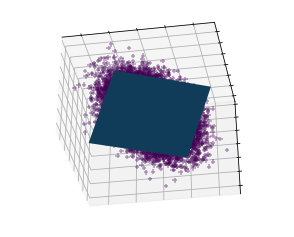

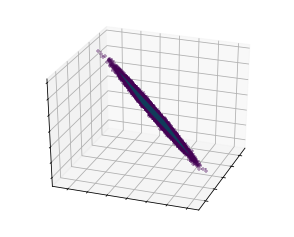

In [13]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
e=np.exp(1);np.random.seed(4)

pdf=lambda x:.5*(stats.norm(scale=.25/e).pdf(x)+stats.norm(scale=4/e).pdf(x))
y=np.random.normal(scale=.5,size=(300000))
x=np.random.normal(scale=.5,size=(300000))
z=np.random.normal(scale=.1,size=len(x))

den,pdz=pdf(x)*pdf(y),pdf(5*z)
den*=pdz

a,b=x+y,2*y,
c=a-b+z

norm=np.sqrt(a.var()+b.var())
a/=norm
b/=norm

def plt_fig(fig_num,elev,azm):
    fig=plt.figure(fig_num,figsize=(4,3))
    plt.clf()
    ax=Axes3D(fig,rect=[0,0,.95,1],elev=elev,azim=azm)
    ax.scatter(a[::10],b[::10],c[::10],c=den[::10],marker='+',alpha=.4)
    Y=np.c_[a,b,c]
    pca=PCA(n_components=3)
    pca.fit(Y)
    score=pca.explained_variance_ratio_
    V=pca.components_
    
    x_pca_ax,y_pca_ax,z_pca_ax=V.T*score/score.min()
    x_pca_ax,y_pca_ax,z_pca_ax=3*V.T
    
    x_pca_plane=np.r_[x_pca_ax[:2],-x_pca_ax[1::-1]]
    y_pca_plane=np.r_[y_pca_ax[:2],-y_pca_ax[1::-1]]
    z_pca_plane=np.r_[z_pca_ax[:2],-z_pca_ax[1::-1]]
    x_pca_plane.shape=(2,2)
    y_pca_plane.shape=(2,2)
    z_pca_plane.shape=(2,2)
    
    ax.plot_surface(x_pca_plane,y_pca_plane,z_pca_plane)
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    
plt_fig(1,-40,-80)
plt_fig(2,30,20)